In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

%matplotlib inline

In [78]:
df = pd.read_csv('Insurance-clean.csv')
df.head()

,Unnamed: 0,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0
2,2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1
4,4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Unnamed: 0          4000 non-null int64
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 4000 non-null object
Marital             4000 non-null object
Education           4000 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       4000 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(12), object(7)
memory usage: 593.9+ KB


In [80]:
df.nunique()

Unnamed: 0          4000
Id                  4000
Age                   70
Job                   12
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64

In [81]:
df['Communication'] = df['Communication'].map({'telephone':0, 'cellular':1})
df.head()

,Unnamed: 0,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,0,1,32,management,single,tertiary,0,1218,1,0,0,28,jan,2,-1,0,13:45:20,13:46:30,0
1,1,2,32,blue-collar,married,primary,0,1156,1,0,1,26,may,5,-1,0,14:49:03,14:52:08,0
2,2,3,29,management,single,tertiary,0,637,1,0,1,3,jun,1,119,1,16:30:24,16:36:04,1
3,3,4,25,student,single,primary,0,373,1,0,1,11,may,2,-1,0,12:06:43,12:20:22,1
4,4,5,30,management,married,tertiary,0,2694,0,0,1,3,jun,1,-1,0,14:35:44,14:38:56,0


In [82]:
df['Marital'] = df['Marital'].map({'divorced':0, 'married':1, 'single':2})
df.head()

,Unnamed: 0,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,0,1,32,management,2,tertiary,0,1218,1,0,0,28,jan,2,-1,0,13:45:20,13:46:30,0
1,1,2,32,blue-collar,1,primary,0,1156,1,0,1,26,may,5,-1,0,14:49:03,14:52:08,0
2,2,3,29,management,2,tertiary,0,637,1,0,1,3,jun,1,119,1,16:30:24,16:36:04,1
3,3,4,25,student,2,primary,0,373,1,0,1,11,may,2,-1,0,12:06:43,12:20:22,1
4,4,5,30,management,1,tertiary,0,2694,0,0,1,3,jun,1,-1,0,14:35:44,14:38:56,0


In [83]:
df['Education'] = df['Education'].map({'primary':0, 'secondary':1, 'tertiary':2})
df.head()

,Unnamed: 0,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,0,1,32,management,2,2,0,1218,1,0,0,28,jan,2,-1,0,13:45:20,13:46:30,0
1,1,2,32,blue-collar,1,0,0,1156,1,0,1,26,may,5,-1,0,14:49:03,14:52:08,0
2,2,3,29,management,2,2,0,637,1,0,1,3,jun,1,119,1,16:30:24,16:36:04,1
3,3,4,25,student,2,0,0,373,1,0,1,11,may,2,-1,0,12:06:43,12:20:22,1
4,4,5,30,management,1,2,0,2694,0,0,1,3,jun,1,-1,0,14:35:44,14:38:56,0


In [84]:
labelencoder = LabelEncoder()

In [85]:
df['LastContactMonth'] = labelencoder.fit_transform(df['LastContactMonth'])

In [86]:
df.head()

,Unnamed: 0,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,0,1,32,management,2,2,0,1218,1,0,0,28,4,2,-1,0,13:45:20,13:46:30,0
1,1,2,32,blue-collar,1,0,0,1156,1,0,1,26,8,5,-1,0,14:49:03,14:52:08,0
2,2,3,29,management,2,2,0,637,1,0,1,3,6,1,119,1,16:30:24,16:36:04,1
3,3,4,25,student,2,0,0,373,1,0,1,11,8,2,-1,0,12:06:43,12:20:22,1
4,4,5,30,management,1,2,0,2694,0,0,1,3,6,1,-1,0,14:35:44,14:38:56,0


In [87]:
df['Job'].unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', 'None', 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [88]:
labelencoder = LabelEncoder()

In [89]:
df['Job'] = labelencoder.fit_transform(df['Job'])

In [90]:
df.head()

,Unnamed: 0,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,0,1,32,5,2,2,0,1218,1,0,0,28,4,2,-1,0,13:45:20,13:46:30,0
1,1,2,32,2,1,0,0,1156,1,0,1,26,8,5,-1,0,14:49:03,14:52:08,0
2,2,3,29,5,2,2,0,637,1,0,1,3,6,1,119,1,16:30:24,16:36:04,1
3,3,4,25,9,2,0,0,373,1,0,1,11,8,2,-1,0,12:06:43,12:20:22,1
4,4,5,30,5,1,2,0,2694,0,0,1,3,6,1,-1,0,14:35:44,14:38:56,0


In [91]:
df['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

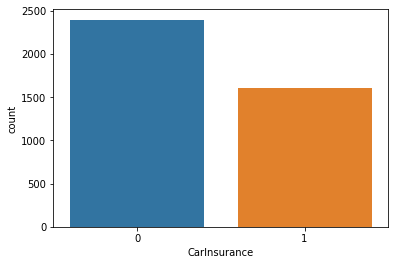

In [92]:
sns.countplot(df['CarInsurance'])

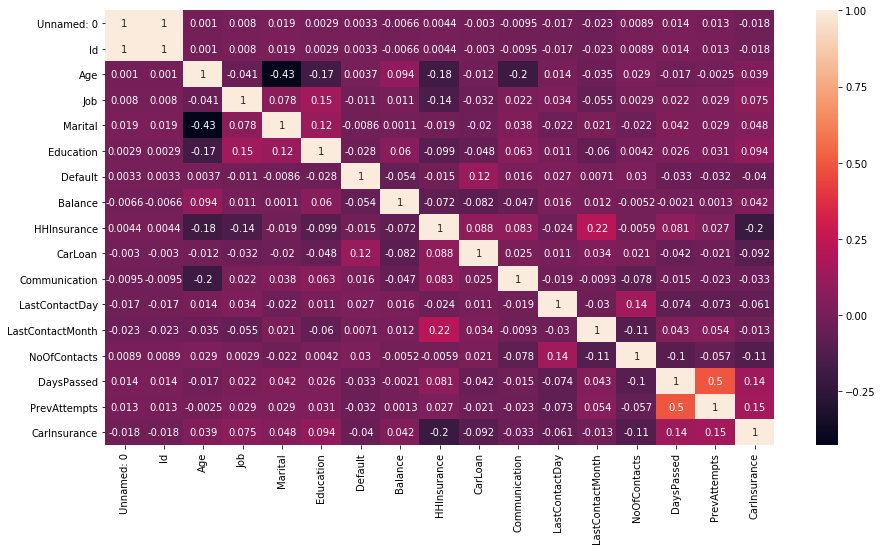

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [94]:
X = df.drop(columns=['Unnamed: 0', 'Id', 'Default', 'LastContactMonth', 'CarInsurance', 'CallStart', 'CallEnd'])
y = df['CarInsurance']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, stratify = y,random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 12), (800, 12), (3200,), (800,))

In [96]:
## Logistic Regression

In [97]:
modelLog = LogisticRegression()

In [98]:
modelLog.fit(X_train, y_train)

/home/st-pierre/anaconda3/envs/mypackages/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
print(modelLog.score(X_train, y_train), modelLog.score(X_test, y_test))

pred_logreg_base = modelLog.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))
print()

0.646875 0.63875
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       479
           1       0.67      0.49      0.56       321

    accuracy                           0.70       800
   macro avg       0.69      0.66      0.67       800
weighted avg       0.69      0.70      0.69       800


Accuracy:  0.6975



Confusion Matrix: 
 [[416  63]
 [226  95]]


Text(33.0, 0.5, 'Aktual')

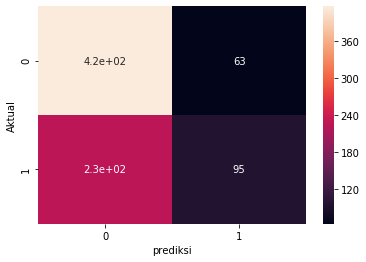

In [100]:
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_logreg_base))

cm = confusion_matrix(y_test, pred_logreg_base)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('prediksi')
ax.set_ylabel('Aktual')

In [101]:
## Random Forest Base

In [102]:
base_RF = RandomForestClassifier()

In [103]:
base_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
print(base_RF.score(X_train, y_train), base_RF.score(X_test, y_test))

pred_RF_base = base_RF.predict(X_test)
print(classification_report(y_test, pred_RF_base))
print()
print('Accuracy: ', accuracy_score(y_test, pred_RF_base))
print()

1.0 0.69625
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       479
           1       0.67      0.49      0.56       321

    accuracy                           0.70       800
   macro avg       0.69      0.66      0.66       800
weighted avg       0.69      0.70      0.69       800


Accuracy:  0.69625



Confusion Matrix: 
 [[401  78]
 [165 156]]


Text(33.0, 0.5, 'Aktual')

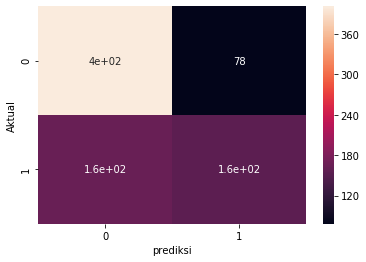

In [110]:
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_RF_base))

cm = confusion_matrix(y_test, pred_RF_base)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('prediksi')
ax.set_ylabel('Aktual')

In [106]:
## XGB Base

In [107]:
base_XGB = XGBClassifier()

In [108]:
base_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [114]:
print(base_XGB.score(X_train, y_train), base_XGB.score(X_test, y_test))

pred_xgb_base = base_XGB.predict(X_test)
print(classification_report(y_test, pred_xgb_base))
print()
print('Accuracy: ', accuracy_score(y_test, pred_xgb_base))
print()

0.73 0.695
              precision    recall  f1-score   support

           0       0.69      0.88      0.78       479
           1       0.70      0.42      0.53       321

    accuracy                           0.69       800
   macro avg       0.70      0.65      0.65       800
weighted avg       0.70      0.69      0.67       800


Accuracy:  0.695



In [116]:
## Hyperparameter Tuning

In [118]:
# Random Forest

param_RF =  {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
    "criterion": ['gini', 'entropy']}

model = RandomizedSearchCV(base_RF, param_RF, cv=5, n_iter=50, n_jobs=-1, verbose=1, random_state=50)
model.fit(X_train, y_train)
print(model.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.2min finished


{'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}
